### Install required packages:

In [4]:
!pip install pandas
!pip install seaborn

### Import required libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


### Load dataset

In [10]:
bike_dataset = pd.read_csv('bike_sharing.csv')
bike_dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Define the attributes to include in the Histograms

In [7]:
columns_to_plot = {
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'hr': 'Hour',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather Situation',
    'temp': 'Temperature (normalized)',
    'atemp': 'Feeling Temperature (normalized)',
    'hum': 'Humidity (normalized)',
    'windspeed': 'Windspeed (normalized)',
    'casual': 'Casual Users',
    'registered': 'Registered Users',
    'cnt': 'Total Count of Bike Rentals'
}


In [ ]:

    if pd.api.types.is_numeric_dtype(bike_dataset[column]):
        sns.histplot(bike_dataset[column], kde=True, ax=axs[i], color='skyblue', edgecolor='black', bins=15)
        max_count = max(np.histogram(bike_dataset[column].dropna(), bins=15)[0])
        axs[i].set_ylim(top=max_count * 1.1)
    else:
        sns.countplot(data=obesity_dataset, x=column, ax=axs[i], color='skyblue', edgecolor='black')
        axs[i].tick_params(axis='x', rotation=20)

### Generate Histograms

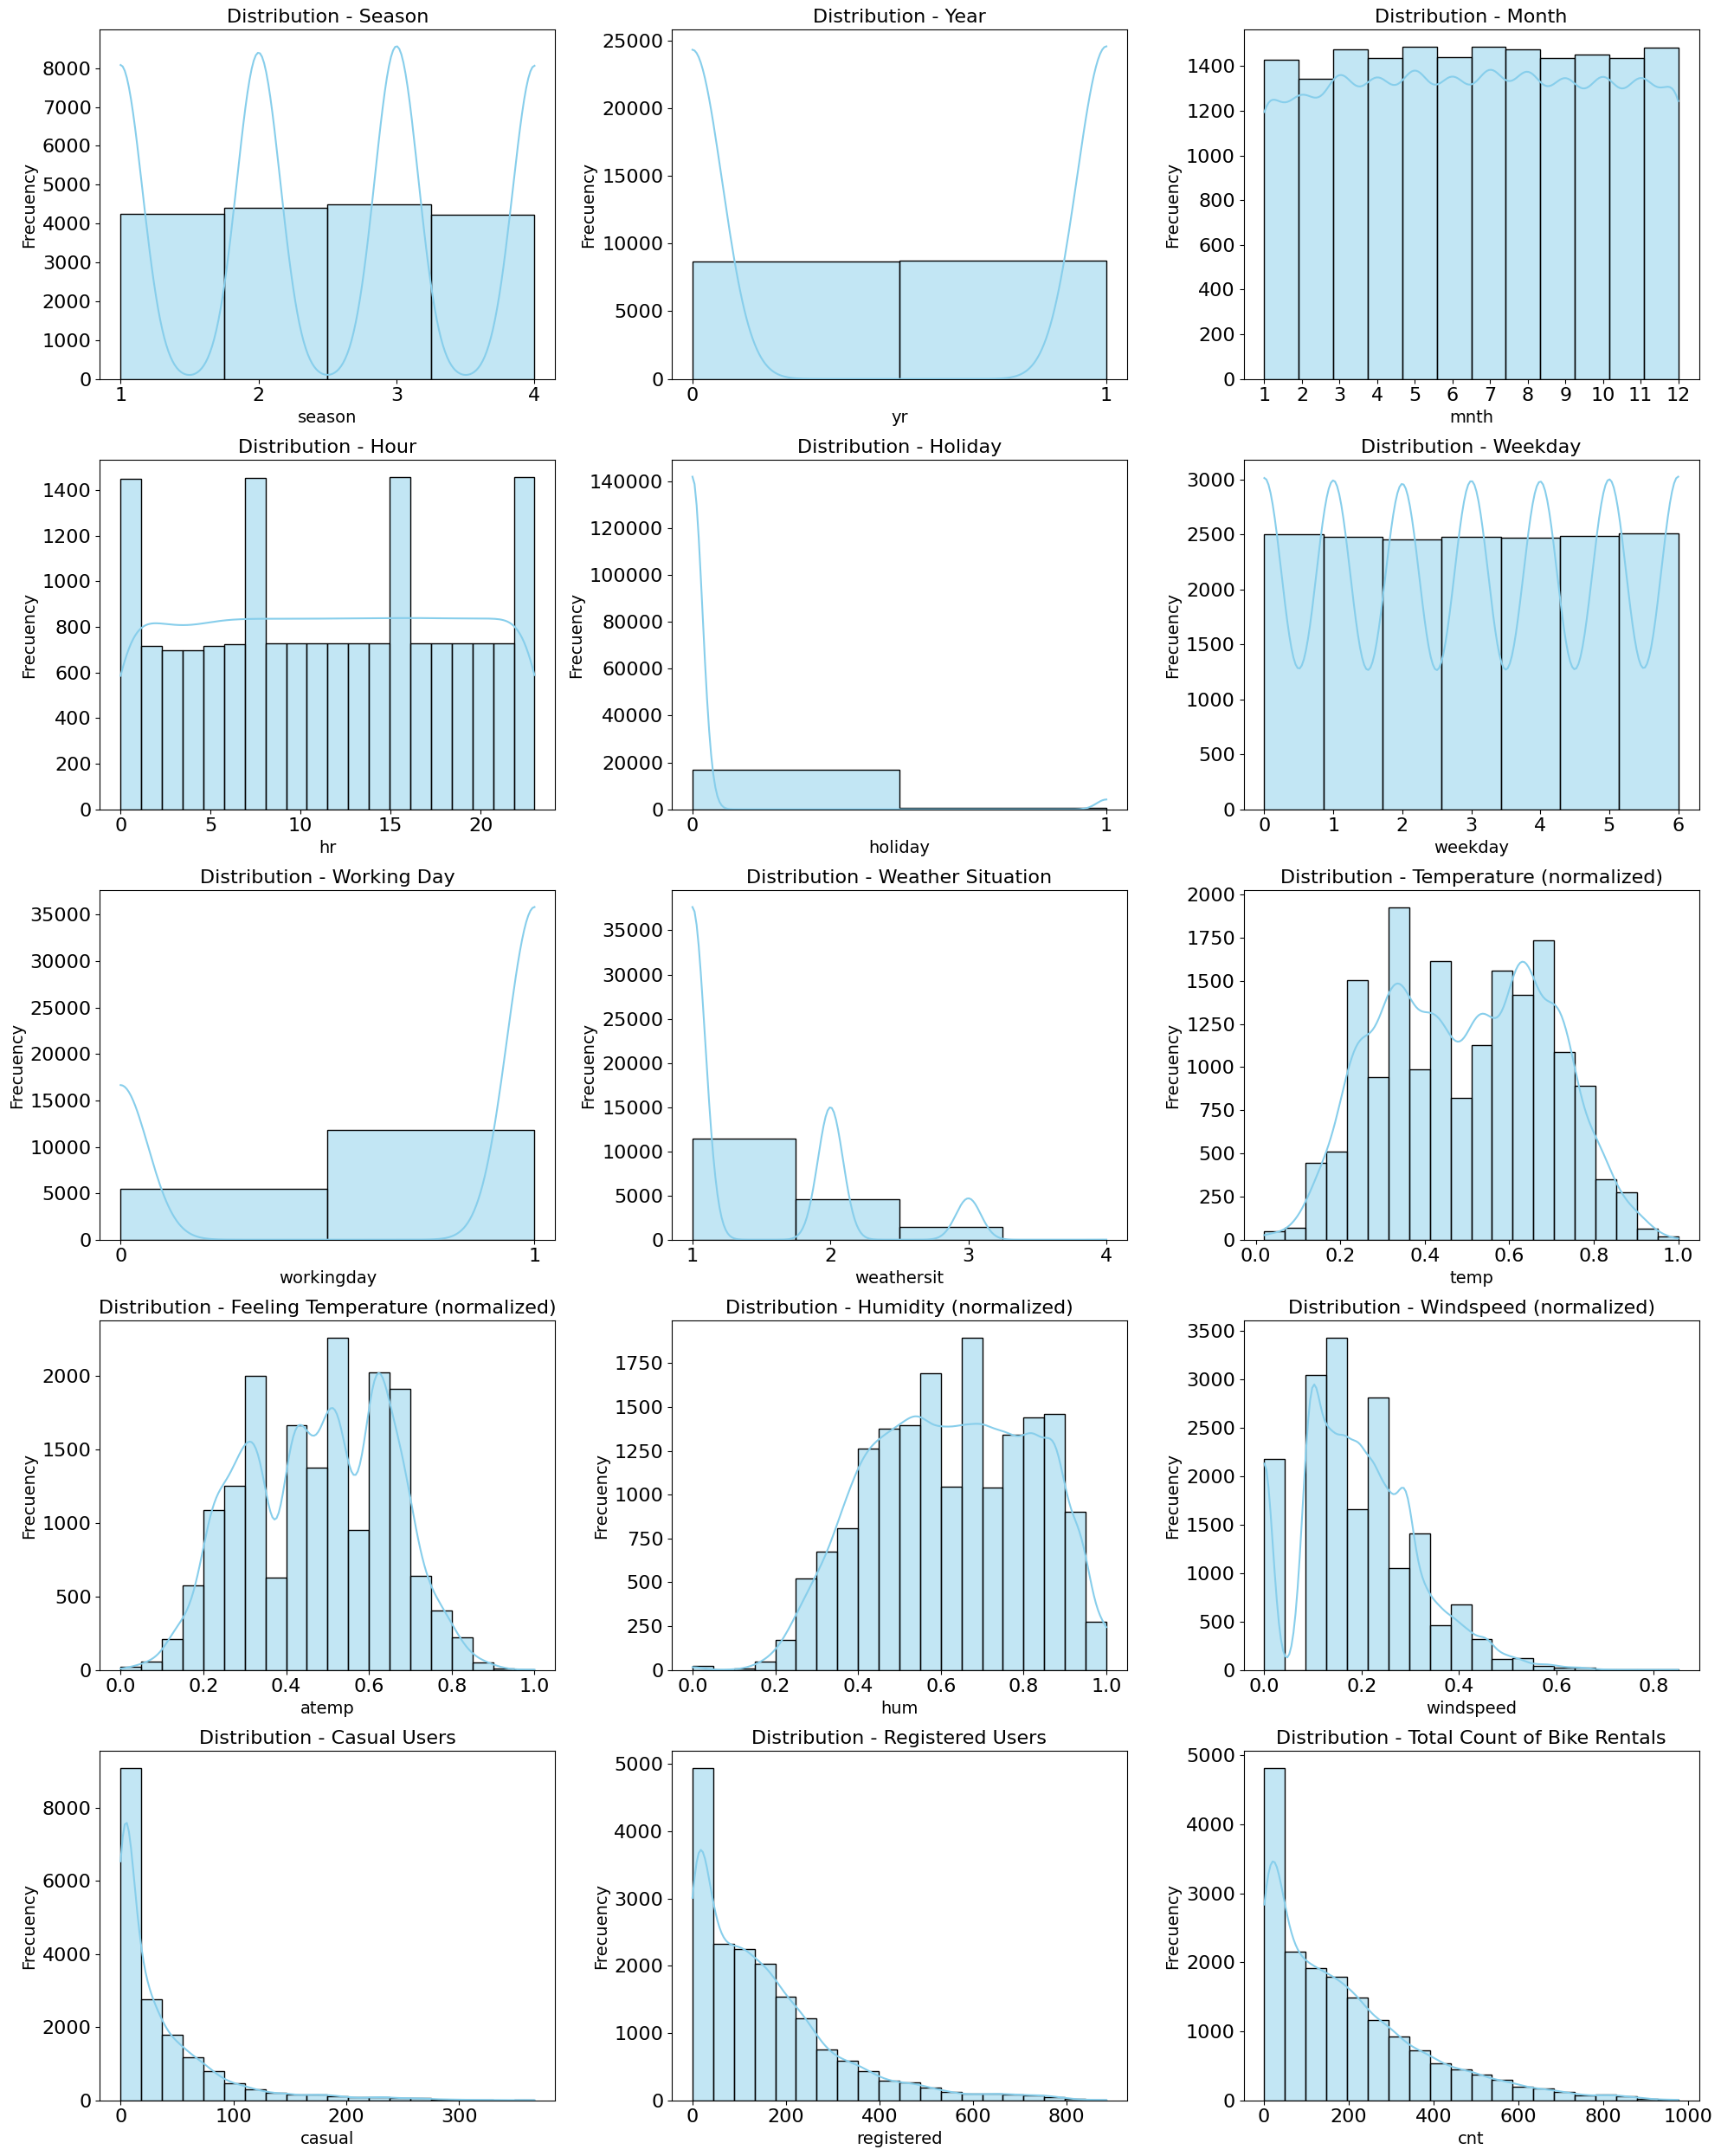

In [11]:
charts_per_row = 3
total_columns = len(columns_to_plot)
rows = math.ceil(total_columns / charts_per_row)

fig, axs = plt.subplots(rows, charts_per_row, figsize=(20, rows * 5))

axs = axs.ravel()

for i, column in enumerate(columns_to_plot):
    n_bins = 20
    unique = np.unique(bike_dataset[column])
    if len(unique) < 20:
        n_bins = len(unique)
    sns.histplot(bike_dataset[column], kde=True, ax=axs[i], color='skyblue', edgecolor='black', bins=n_bins)

    if len(unique) < 20:
        axs[i].set_xticks(unique)
    
    axs[i].tick_params(axis='y', labelsize=16)
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].set_title(f'Distribution - {columns_to_plot[column]}', fontsize=16)
    axs[i].set_xlabel(column, fontsize=14)
    axs[i].set_ylabel('Frecuency', fontsize=14)

plt.tight_layout()
plt.show()
